# SageMath para estudantes de física
***
Rogério T. C.

## Aula II.1

## O problema de Kepler

Na mecânica clássica, o problema de Kepler é um caso especial do problema de dois corpos, no qual os dois corpos interagem por uma força central que varia em intensidade com o inverso do quadrado da distância $\mathbf{r}$ entre eles. O problema consiste em encontrar a posição dos dois corpos ao longo do tempo, dadas suas massas, posições e velocidades. 

Vamos considerar o caso em que a posição de uma das massas coincide com a do centro de massa (como no sistema sol+planeta). Por se tratar um problema de força central, o movimento é confinado em um plano. Isso nos permite descrevê-lo em coordenadas polares.

O potencial e a energia cinética são dados respectivamente por
$$V(r) = -\frac{GMm}{r} \quad \text{e} \quad T = \frac{1}{2}m\left(\dot{r}^2+r^2\dot{\phi}^2\right).$$

In [1]:
%display latex
reset()

Variáveis dinâmicas

In [2]:
var('t m G M', domain='positive')
phi(t) = function('phi')(t)
r(t) = function('r')(t)

In [3]:
assume(r(t)>0)

In [4]:
assumptions()

[t > 0, m > 0, G > 0, M > 0, r(t) > 0]

Vetor posição

In [5]:
R = vector([r(t)*cos(phi(t)),r(t)*sin(phi(t))]);R

(cos(phi(t))*r(t), r(t)*sin(phi(t)))

In [6]:
R.norm().simplify_trig().canonicalize_radical()

r(t)

Potencial

In [7]:
V = -G*M*m/(r(t));V

-G*M*m/r(t)

Energia cinética

In [8]:
T = m/2*diff(R,t)*diff(R,t);T

1/2*(cos(phi(t))*r(t)*diff(phi(t), t) + sin(phi(t))*diff(r(t), t))^2*m + 1/2*(r(t)*sin(phi(t))*diff(phi(t), t) - cos(phi(t))*diff(r(t), t))^2*m

In [9]:
T = T.simplify_trig();T

1/2*m*r(t)^2*diff(phi(t), t)^2 + 1/2*m*diff(r(t), t)^2

Lagrangiana

In [10]:
L = T-V;L

1/2*m*r(t)^2*diff(phi(t), t)^2 + 1/2*m*diff(r(t), t)^2 + G*M*m/r(t)

Equações de Euler-Lagrange
$$ \displaystyle {\frac {\partial L}{\partial q_{i}}}(t,{\boldsymbol {q}}(t),{\dot {\boldsymbol {q}}}(t))-{\frac {\mathrm {d} }{\mathrm {d} t}}{\frac {\partial L}{\partial {\dot {q}}_{i}}}(t,{\boldsymbol {q}}(t),{\dot {\boldsymbol {q}}}(t))=0$$

$$\frac {\partial L}{\partial q_{i}}(t,{\boldsymbol {q}}(t),{\dot {\boldsymbol {q}}}(t))=0 \Rightarrow {\frac {\partial L}{\partial {\dot {q}}_{i}}}(t,{\boldsymbol {q}}(t),{\dot {\boldsymbol {q}}}(t))=C$$

Usaremos as quantidades conservadas no lugar das equações de Euler-Lagrange

Variáveis simbólicas para energia e momento angular

In [11]:
var('E', domain='real')
var('l', latex_name=r'\ell', domain='positive')

l

Energia conservada

In [12]:
eq_E = E == T+V;eq_E

E == 1/2*m*r(t)^2*diff(phi(t), t)^2 + 1/2*m*diff(r(t), t)^2 - G*M*m/r(t)

In [13]:
def formal_derivative(f, x):
    r"""
    The formal derivative of `f` with respect to the symbolic function `x`.
    """
    tempX = SR.symbol()
    return f.subs({x: tempX}).diff(tempX).subs({tempX: x})

In [14]:
formal_derivative(L,phi)

0

Momento angular conservado

In [15]:
eq_phi = formal_derivative(L,diff(phi,t)) ==l;eq_phi

m*r(t)^2*diff(phi(t), t) == l

In [16]:
eq_phi1 = solve(eq_phi,diff(phi(t),t))[0];eq_phi1

diff(phi(t), t) == l/(m*r(t)^2)

Substituindo o momento angular na energia conservada

In [17]:
eq_E1 = eq_E.subs(eq_phi1);eq_E1

E == 1/2*m*diff(r(t), t)^2 - G*M*m/r(t) + 1/2*l^2/(m*r(t)^2)

In [18]:
eq_r = solve(eq_E1,diff(r(t),t))[1];eq_r

diff(r(t), t) == sqrt(2*G*M*m^2*r(t) + 2*E*m*r(t)^2 - l^2)/(m*r(t))

Pela regra da cadeia,
$$\frac{d\phi}{dr}=\frac{\frac{d\phi}{dt}}{\frac{dr}{dt}}$$

$$\displaystyle \phi = \int \frac{d\phi}{dt}\left(\frac{dr}{dt}\right)^{-1}dr$$

Usaremos a variável simbólica $\varphi$ no lugar da função $\phi$ e uma variável simbólica para a função $r(t)$.

In [19]:
vr = var('vr', latex_name='r', domain='positive')
vp = var('vp', latex_name=r'\varphi')

In [20]:
vr

vr

$$\int \frac{d\phi}{dt}\left(\frac{dr}{dt}\right)^{-1}dr$$

In [21]:
phrt = integral((eq_phi1.rhs()/eq_r.rhs()).subs({r(t):vr}),vr, hold=True);phrt

integrate(l/(sqrt(2*G*M*m^2*vr + 2*E*m*vr^2 - l^2)*vr), vr)

Calculando a integral

In [22]:
assume(G^2*M^2*m^3+2*E*l^2>0)
phrt.unhold()

-arcsin(-G*M*m^2/sqrt(G^2*M^2*m^4 + 2*E*l^2*m) + l^2/(sqrt(G^2*M^2*m^4 + 2*E*l^2*m)*vr))

Solução em termos de $\varphi$

In [23]:
eq_vp = vp ==phrt.unhold();eq_vp

vp == -arcsin(-G*M*m^2/sqrt(G^2*M^2*m^4 + 2*E*l^2*m) + l^2/(sqrt(G^2*M^2*m^4 + 2*E*l^2*m)*vr))

In [24]:
sol_vp = sin(eq_vp.lhs()) == sin(eq_vp.rhs());sol_vp

sin(vp) == sin(-arcsin(-G*M*m^2/sqrt(G^2*M^2*m^4 + 2*E*l^2*m) + l^2/(sqrt(G^2*M^2*m^4 + 2*E*l^2*m)*vr)))

In [25]:
sol_vp = sol_vp.trig_simplify();sol_vp

sin(vp) == (G*M*m^2*vr - l^2)/(sqrt(G^2*M^2*m^4 + 2*E*l^2*m)*vr)

Isolando o $r$

In [26]:
sol_r = solve(sol_vp,vr)[0];sol_r

vr == l^2/(G*M*m^2 - sqrt(G^2*M^2*m^4 + 2*E*l^2*m)*sin(vp))

Solução de livro texto em termos da excentricidade $\epsilon$ da órbita

In [27]:
ep = var('epsilon', domain='real');ep

epsilon

In [28]:
eq_ep = ep == sqrt(1+2*l^2*E/(m*(G*m*M)^2));eq_ep

epsilon == sqrt(2*E*l^2/(G^2*M^2*m^3) + 1)

Para incluir a excentricidade na solução, isolamos $E$ na expressão da excentricidade

In [29]:
assume(ep>0)
sub_E = solve(eq_ep,E)[0]
forget(ep>0)
sub_E

E == 1/2*(G^2*M^2*epsilon^2 - G^2*M^2)*m^3/l^2

e substituimos na solução

In [30]:
sol_r = sol_r.subs(sub_E).canonicalize_radical().factor();sol_r

vr == -l^2/((epsilon*sin(vp) - 1)*G*M*m^2)

Faremos $\varphi \to \varphi - \pi/2$ pra deixar com a cara mais usual nos livros texto.

In [31]:
sol_r = sol_r.subs(vp=vp-pi/2).expand_trig();sol_r

vr == l^2/((epsilon*cos(vp) + 1)*G*M*m^2)

Deixando os dois lados sem dimensão

In [32]:
sol_r = sol_r*G*M*m^2/l^2;sol_r

G*M*m^2*vr/l^2 == (1/(epsilon*cos(vp) + 1))

Vejamos os gráficos das órbitas em coordenadas polares (polar=True)

In [33]:
orbita_0 = plot(sol_r.rhs().subs(ep==0),(vp,0,2*pi),polar=True,aspect_ratio=1, color='red', axes=False, frame=True, title=r'Órbita circular ($\epsilon=0$)')

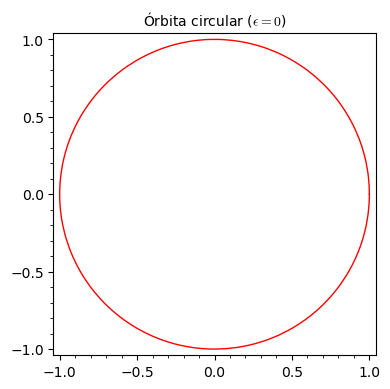

In [34]:
orbita_0

In [35]:
centro = circle((0,0),.01, fill=True, color='black', axes=False)

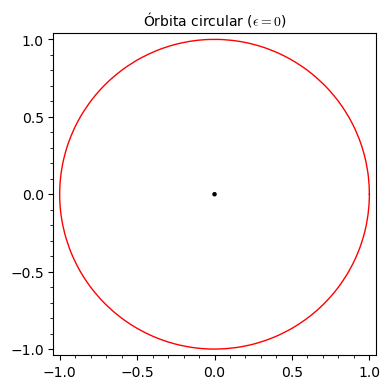

In [36]:
centro+orbita_0

In [37]:
orbita_1 = plot(sol_r.rhs().subs(ep==1),(vp,-.07*pi,.07*pi), polar=True, color='red', axes=False, frame=True, title=r'Órbita parabólica ($\epsilon=1$)')

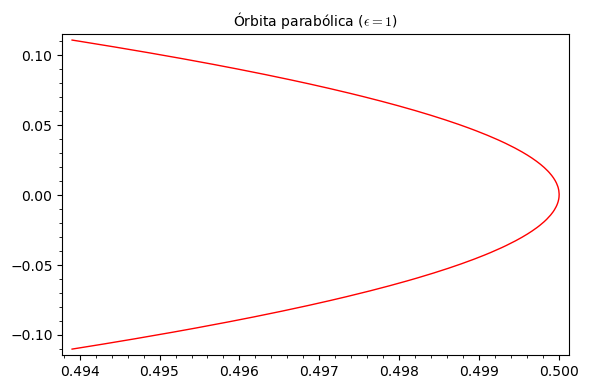

In [38]:
orbita_1

In [39]:
orbita_m = plot(sol_r.rhs().subs(ep==.8),(vp,-pi,pi),aspect_ratio=1, polar=True, color='red', axes=False, frame=True, title=r'Órbita elíptica ($\epsilon<1$)')

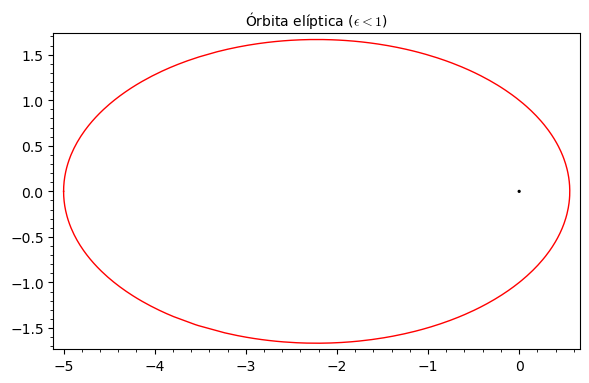

In [40]:
centro + orbita_m

In [41]:
orbita_M = plot(sol_r.rhs().subs(ep==2),(vp,-sqrt(2)/3,sqrt(2)/3), polar=True, color='red', axes=False, frame=True, title=r'Órbita hiperbólica ($\epsilon<1$)')

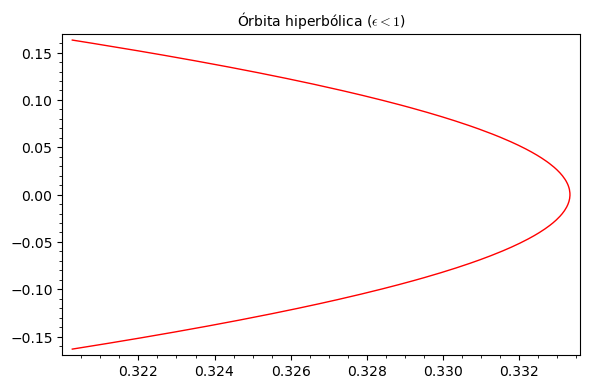

In [42]:
orbita_M

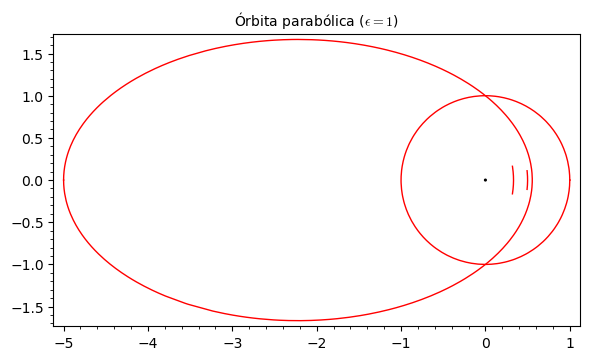

In [43]:
orbita_0+centro+orbita_m+orbita_M+orbita_1

## Calculando a Constante na Lei de Deslocamento de Wien

A [lei do deslocamento de Wien](https://en.wikipedia.org/wiki/Wien%27s_displacement_law) é a lei da física que relaciona o comprimento de onda do pico de emissão de radiação eletromagnética de corpo negro e sua temperatura:
$$
{\displaystyle \lambda _{\text{max}}={\frac {b}{T}}}
$$
onde 

- $\displaystyle \lambda _{\text{max}}$ é o comprimento de onda do pico de intensidade da radiação eletromagnética;

- ${\displaystyle T\,}$ é a temperatura absoluta do corpo negro;

- ${\displaystyle b\,}$ é a constante de proporcionalidade, chamada *constante de dispersão de Wien*.

Vamos calcular a constante $b$ usando a  lei de Planck para a radiação de um corpo negro 
$$
{\displaystyle u(\lambda ,T)={2hc^{2} \over \lambda ^{5}}{1 \over e^{hc/\lambda kT}-1}.}
$$


| Constantes           |                            | Unidade          |
| :-----------------:  | :------------------------- | :--------------- |
| ${\displaystyle h}$  | constante de Planck        | J$\cdot$s        |
| ${\displaystyle c}$  | velocidade da luz no vácuo | m$\cdot$s$^{-1}$ |
| ${\displaystyle e}$  | número de Euler            | sem dimensão     |
| ${\displaystyle k}$  | constante de Boltzmann     | J$\cdot$K$^{-1}$ |

In [44]:
var('h c k', domain='positive')
la = var('la', latex_name = r'\lambda', domain='positive')
lam = var('lam', latex_name = r'\lambda_{\text{max}}', domain='positive')
u(la ,T) = 2*h*c^2/(la^5)*1/(e^(h*c/(k*la*T))-1)

In [45]:
u(la,T)

2*c^2*h/(la^5*(e^(c*h/(T*k*la)) - 1))

In [46]:
u0 = diff(u(lam,T),lam)==0;u0

-10*c^2*h/(lam^6*(e^(c*h/(T*k*lam)) - 1)) + 2*c^3*h^2*e^(c*h/(T*k*lam))/(T*k*lam^7*(e^(c*h/(T*k*lam)) - 1)^2) == 0

In [47]:
solve(u0,lam)

[lam == 1/5*c*h*e^(c*h/(T*k*lam))/(T*k*e^(c*h/(T*k*lam)) - T*k)]

In [48]:
u1 = (u0*lam^6).expand();u1

-10*c^2*h/(e^(c*h/(T*k*lam)) - 1) + 2*c^3*h^2*e^(c*h/(T*k*lam))/(T*k*lam*(e^(2*c*h/(T*k*lam)) - 2*e^(c*h/(T*k*lam)) + 1)) == 0

In [49]:
eqx = x == c*h/(lam*T*k);eqx

x == c*h/(T*k*lam)

In [50]:
eql = solve(eqx,lam)[0];eql

lam == c*h/(T*k*x)

In [51]:
u2 = u1.subs(eql);u2

2*c^2*h*x*e^x/(e^(2*x) - 2*e^x + 1) - 10*c^2*h/(e^x - 1) == 0

In [52]:
eqx2 = solve(u2,x)[0];eqx2

x == 5*(e^x - 1)*e^(-x)

***

### Exercício

Encontre uma solução numérica para a equação
$$x = 5 \, {\left(e^{x} - 1\right)} e^{\left(-x\right)}$$

** `find_root(equação, min, max)`

***

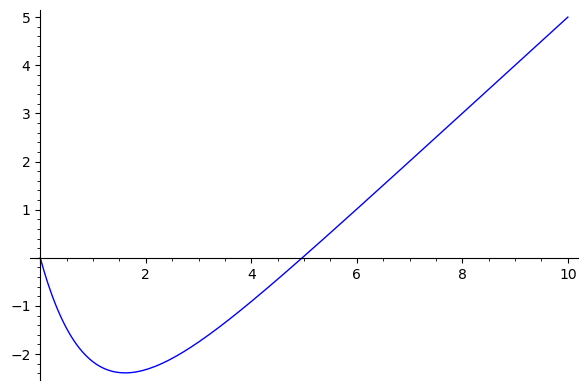

In [53]:
plot(eqx2,x,(x,0,10))

In [54]:
eqx3 = x == find_root(eqx2,4,6);eqx3

x == 4.96511423174416

In [55]:
eql2 = (eql*T).subs(eqx3);eql2

T*lam == 0.20140523527264692*c*h/k

In [56]:
from scipy.constants import c as nc
from scipy.constants import h as nh
from scipy.constants import k as nk

In [57]:
constantes = {c:nc, k:nk, h:nh}

In [58]:
constantes

{c: 299792458.0, k: 1.380649e-23, h: 6.62607015e-34}

In [59]:
eql2.subs(constantes)

T*lam == 0.0028977719551852403

Logo,
$$b \approx 2,89777\, \text{mm}\cdot\text{K}$$

In [60]:
u(500/(10^9),4500).subs(constantes)

6377929856000.104

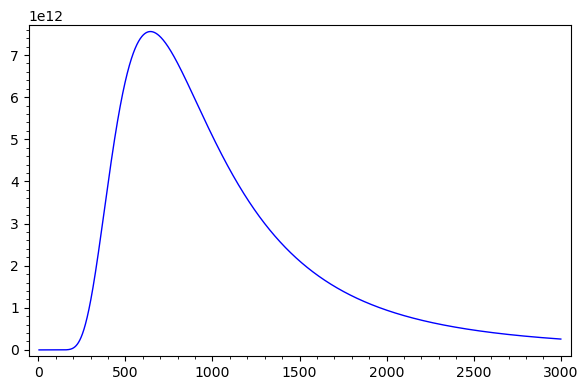

In [61]:
plot(u(la/(10^9),4500).subs(constantes),0,3000, frame=True, axes=False)

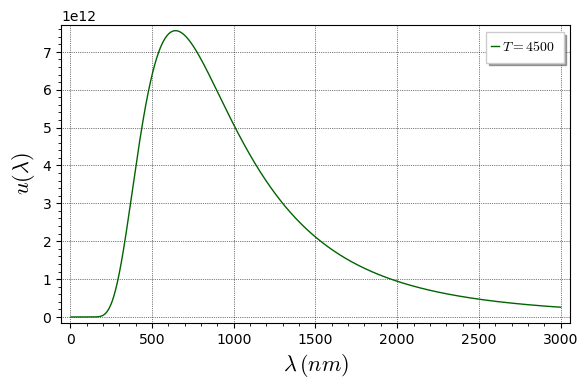

In [62]:
plot(u(la/(10^9),4500).subs(constantes),0,3000, color=colors.darkgreen,axes=False, frame=True, gridlines=True, axes_labels=[r'$\lambda\, (nm)$',r'$u(\lambda)$'], legend_label='$T=4500$')

In [63]:
lista_u = [u(la/(10^9),k).subs(constantes) for k in [3500, 4000, 4500, 5000, 5500]]

In [64]:
lista_u

[(1.1910429723971882e+29)/(la^5*(e^(4110.791078582668/la) - 1)),
 (1.1910429723971882e+29)/(la^5*(e^(3596.9421937598345/la) - 1)),
 (1.1910429723971882e+29)/(la^5*(e^(3197.2819500087417/la) - 1)),
 (1.1910429723971882e+29)/(la^5*(e^(2877.553755007867/la) - 1)),
 (1.1910429723971882e+29)/(la^5*(e^(2615.9579590980616/la) - 1))]

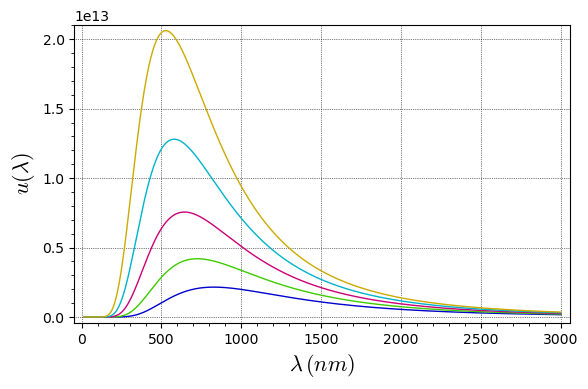

In [65]:
plot(lista_u,0,3000, axes=False, frame=True, gridlines=True, axes_labels=[r'$\lambda\, (nm)$',r'$u(\lambda)$'])